Front Radius: -174.33333333333334mm
Back Radius: 51.91066997518611mm
Diopter: -15.072722921975368
              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      0.0000
    1:  -174.333333      2.92500   600.420             1      17.150
    2:    51.910670      20.0000       air             1      17.401
  Img:     0.000000      0.00000                       1      22.499
efl              -66.35
ffl               67.75
pp1               1.402
bfl              -66.76
ppk              0.4174
f/#              -1.934
m             6.635e-09
red           1.507e+08
obj_dist          1e+10
obj_ang               1
enp_dist             -0
enp_radius        17.15
na obj        1.715e-09
n obj                 1
img_dist         -66.76
img_ht           -1.158
exp_dist         -88.55
exp_radius         16.8
na img           0.2503
n img                 1
optical invariant       0.2994


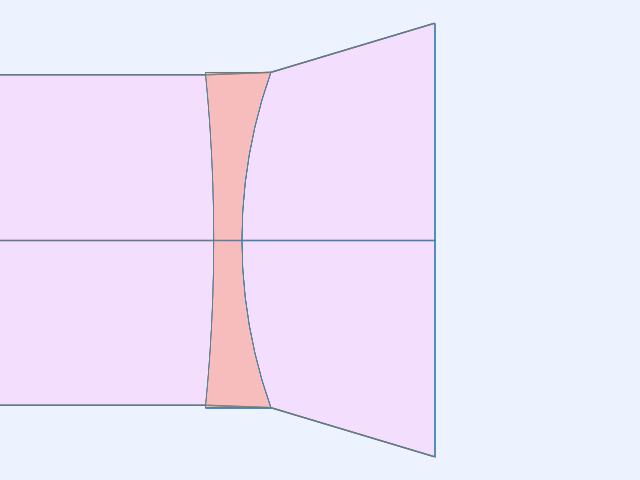

In [5]:
# R -700 / -075 x 5
# L -625 / -175 x 3
# Front Curvature = +200
# n=1.67, Abbe=32

# -7.00 dipoter = -142.86mm focal length

%matplotlib widget
isdark = False
from rayoptics.environment import *

opm = OpticalModel()
opm.radius_mode = True

    
osp = opm['optical_spec']
osp['pupil'] = PupilSpec(osp, key=['object', 'pupil'], value=34.3)
osp['fov'] = FieldSpec(osp, key=['object', 'angle'], value=20.0, flds=[0,], is_relative=True)
osp['wvls'] = WvlSpec([('F', 0.5), (587.5618, 1.0), ('C', 0.5)], ref_wl=1)
    
sm = opm['seq_model']    

# Object distance
sm.gaps[0].thi = 1e10

front_diopter = -3
front_radius = (0.523 / front_diopter)

r_index = 1.6
lens_diopter = -15
back_radius = 1/((1/front_radius) - lens_diopter / (r_index-1))

print("Front Radius: " + str(front_radius*1000) + "mm")
print("Back Radius: " + str(back_radius*1000) + "mm")

sm.add_surface([1000*front_radius, (2.1+3.75)/2, r_index, 42, 500])
sm.add_surface([1000*back_radius, 20, 'Air'])



opm.update_model()

D=1000/opm['analysis_results']['parax_data'].fod.efl 
print("Diopter: " + str(D))

sm.list_model()

pm = opm['parax_model']
pm.first_order_data()

plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()
opm['ele_model'].elements

opm.save_model('/Users/joshreich/src/lensStack/glass_lens')


In [43]:
sm.surface_label_list

<bound method SequentialModel.surface_label_list of <rayoptics.seq.sequential.SequentialModel object at 0x7f9a981ec0a0>>

Front Radius: 33.741935483870975mm
Back Radius: 348.6666666666672mm
Diopter: 13.987738911932938
              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      0.0000
    1:    33.741935      4.50000   520.350             1      17.150
    2:   348.666667      3.00000       air             1      17.104
  Img:     0.000000      0.00000                       1      16.396
efl               71.49
ffl              -71.81
pp1             -0.3157
bfl               68.23
ppk               3.262
f/#               2.084
m            -7.149e-09
red          -1.399e+08
obj_dist          1e+10
obj_ang               1
enp_dist             -0
enp_radius        17.15
na obj        1.715e-09
n obj                 1
img_dist          68.23
img_ht            1.248
exp_dist          62.28
exp_radius        17.07
na img          -0.2333
n img                 1
optical invariant       0.2994


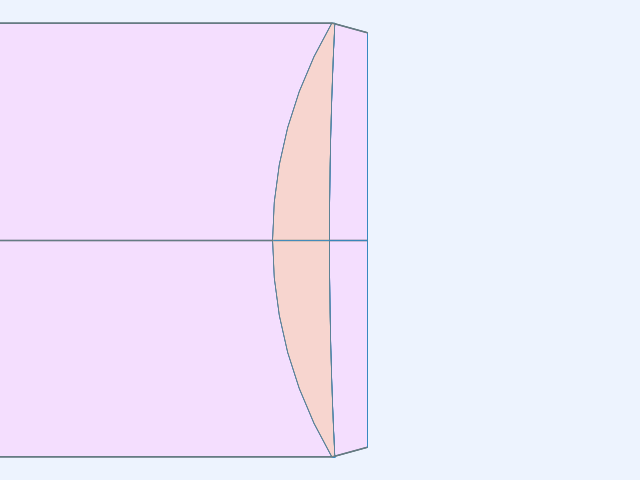

In [57]:
# R -700 / -075 x 5
# L -625 / -175 x 3
# Front Curvature = +200
# n=1.67, Abbe=32

# -7.00 dipoter = -142.86mm focal length

def add_measured_lens(opm, r_index, abbe, total_lens_diopter, front_curvature_diopter, back_curvature_diopter, thickness, sd, gap):
    # Assume curvatures were measured with a meter calibrated to glass with 1.523 ref index
    front_radius = 0.523 / front_curvature_diopter
    back_radius = 0.523 / back_curvature_diopter #
    back_radius = 1/((1/front_radius) - total_lens_diopter / (0.523))
    
    print("Front Radius: " + str(front_radius*1000) + "mm")
    print("Back Radius: " + str(back_radius*1000) + "mm")
    
    sm = opm['seq_model']    
    sm.add_surface([1000*front_radius, thickness, r_index, abbe, sd])
    sm.add_surface([1000*back_radius, gap, 'Air'])
    opm.rebuild_from_seq()

    
    
opm = OpticalModel()
opm.radius_mode = True

    
osp = opm['optical_spec']
osp['pupil'] = PupilSpec(osp, key=['object', 'pupil'], value=34.3)
osp['fov'] = FieldSpec(osp, key=['object', 'angle'], value=20.0, flds=[0,], is_relative=True)
osp['wvls'] = WvlSpec([('F', 0.5), (587.5618, 1.0), ('C', 0.5)], ref_wl=1)
    
sm = opm['seq_model']    

# Object distance
sm.gaps[0].thi = 1e10

# Object distance
sm.gaps[0].thi = 1e10

add_measured_lens(opm, 
                  r_index=1.52, abbe=35, 
                  total_lens_diopter=14.0, front_curvature_diopter=15.5, back_curvature_diopter=-5.5,
                  thickness=4.5, sd=30.0, gap=3.0)

opm.update_model()


D=1000/opm['analysis_results']['parax_data'].fod.efl 
print("Diopter: " + str(D))

sm.list_model()

pm = opm['parax_model']
pm.first_order_data()

plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()
opm['ele_model'].elements

opm.save_model('/Users/joshreich/src/lensStack/meniscus')
